# Project: Investigate Medical Appointment Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#limitations">Limitations</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The dataset to be investigated provides information on medical appointments for patients in Brazil.
> We will explore how or if certain factors affect if an individual will miss their appointment. The factors we will be exploring are scholarship, receiving an sms reminder, alcoholism and gender.

In [1]:
# import all the necessary packages before reading data file

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('KaggleV2-May-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


> Below we get some basic information and summary on the data

In [3]:
df.shape

(110527, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [6]:
# check for duplicate data

df.duplicated().sum()

0

In [7]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


<a id='wrangling'></a>
## Data Wrangling

>- An usual age was found in the dataset. We delete that row because it will not impact our analysis significantly.
>- We change some columns to the right type, create new columns and drop the ones we will not be making use of.

>**Note:** New versions of the dataset are created as we make changes

In [8]:
df.query('Age == -1')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [9]:
df_v2 = df.drop(df.index[99832])

In [10]:
df_v2['ScheduledDay'] = pd.to_datetime(df_v2['ScheduledDay']).dt.tz_localize(None)
df_v2['AppointmentDay'] = pd.to_datetime(df_v2['AppointmentDay']).dt.tz_localize(None)

In [11]:
df_v2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110526 non-null  float64       
 1   AppointmentID   110526 non-null  int64         
 2   Gender          110526 non-null  object        
 3   ScheduledDay    110526 non-null  datetime64[ns]
 4   AppointmentDay  110526 non-null  datetime64[ns]
 5   Age             110526 non-null  int64         
 6   Neighbourhood   110526 non-null  object        
 7   Scholarship     110526 non-null  int64         
 8   Hipertension    110526 non-null  int64         
 9   Diabetes        110526 non-null  int64         
 10  Alcoholism      110526 non-null  int64         
 11  Handcap         110526 non-null  int64         
 12  SMS_received    110526 non-null  int64         
 13  No-show         110526 non-null  object        
dtypes: datetime64[ns](2), float64(1), in

In [12]:
df_v2['day_of_week'] = df_v2['AppointmentDay'].dt.day_name()
df_v2['is_weekend'] = np.where(df_v2['day_of_week'].isin(['Saturday','Sunday']), 'weekend', 'weekday')

In [13]:
df_v2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110526 non-null  float64       
 1   AppointmentID   110526 non-null  int64         
 2   Gender          110526 non-null  object        
 3   ScheduledDay    110526 non-null  datetime64[ns]
 4   AppointmentDay  110526 non-null  datetime64[ns]
 5   Age             110526 non-null  int64         
 6   Neighbourhood   110526 non-null  object        
 7   Scholarship     110526 non-null  int64         
 8   Hipertension    110526 non-null  int64         
 9   Diabetes        110526 non-null  int64         
 10  Alcoholism      110526 non-null  int64         
 11  Handcap         110526 non-null  int64         
 12  SMS_received    110526 non-null  int64         
 13  No-show         110526 non-null  object        
 14  day_of_week     110526 non-null  obj

In [14]:
df_v2.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,day_of_week,is_weekend
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday,weekday
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday,weekday
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday,weekday
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday,weekday
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday,weekday


In [15]:
df_v2.day_of_week.value_counts()

Wednesday    25867
Tuesday      25640
Monday       22714
Friday       19019
Thursday     17247
Saturday        39
Name: day_of_week, dtype: int64

In [16]:
df_v2.is_weekend.value_counts()

weekday    110487
weekend        39
Name: is_weekend, dtype: int64

In [17]:
df_v3 = df_v2.drop(['ScheduledDay','AppointmentDay', 'Age', 
                    'Neighbourhood', 'Hipertension','Diabetes',
                    'Handcap', "day_of_week"], axis=1)

df_v3.head()

,PatientId,AppointmentID,Gender,Scholarship,Alcoholism,SMS_received,No-show,is_weekend
0,2.987250e+13,5642903,F,0,0,0,No,weekday
1,5.589978e+14,5642503,M,0,0,0,No,weekday
2,4.262962e+12,5642549,F,0,0,0,No,weekday
3,8.679512e+11,5642828,F,0,0,0,No,weekday
4,8.841186e+12,5642494,F,0,0,0,No,weekday


In [18]:
df_v3.rename(columns={'PatientId':'patient_id', 'AppointmentID':'appointment_id', 'Gender':'gender', 
                      'Scholarship':'scholarship', 'Alcoholism':'alcoholism',
                   'Handcap':'handicap','No-show':'missed_appointment'}, inplace=True)
# confirm changes
df_v3.head()

,patient_id,appointment_id,gender,scholarship,alcoholism,SMS_received,missed_appointment,is_weekend
0,2.987250e+13,5642903,F,0,0,0,No,weekday
1,5.589978e+14,5642503,M,0,0,0,No,weekday
2,4.262962e+12,5642549,F,0,0,0,No,weekday
3,8.679512e+11,5642828,F,0,0,0,No,weekday
4,8.841186e+12,5642494,F,0,0,0,No,weekday


<a id='eda'></a>
## Exploratory Data Analysis

> We explore the data further and create clear visualizations that help us answer our questions

In [19]:
# functions for chart labels

def bar_title(col_to_plot):
    plt.title(f'Proportion of appointment misses by {col_to_plot}');
    plt.xlabel(f'{col_to_plot}');
    plt.ylabel('proportion');

def pie_title(col_to_plot):
    plt.title(f'Proportion of appointment misses by {col_to_plot}');
    plt.xlabel('');
    plt.ylabel('');

def pie_percentage():
    plt.title('Percentage of people');
    plt.xlabel('');
    plt.ylabel('');

### Question1: How does scholarship influence missing appointment?

In [20]:
# influence of scholarship
df_v3.missed_appointment.value_counts()

No     88207
Yes    22319
Name: missed_appointment, dtype: int64

In [21]:
df_v3.scholarship.value_counts()

0    99665
1    10861
Name: scholarship, dtype: int64

In [22]:
p1 = df_v3.groupby(["missed_appointment", "scholarship"]).size()
p1.unstack()

scholarship,0,1
missed_appointment,,
No,79924,8283
Yes,19741,2578


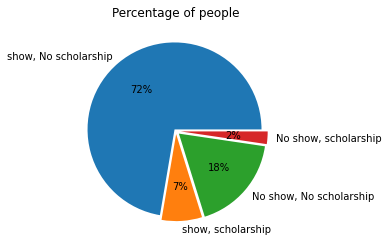

In [23]:
my_labels = ['show, No scholarship','show, scholarship','No show, No scholarship','No show, scholarship']

p1.plot.pie(subplots=True, autopct='%1.0f%%', labels=my_labels, explode=(0.025, 0.035, 0.045, 0.055));

pie_percentage()

##### The cell below shows the proportion of people who missed their appointment while having a scholarship and that of those who  did not showed up but also didn't have a scholarship.

** There is a wide margin between the number of people who received scholarships and those who didn't. Therefore analysis and visualization based on proportions rather than the actual numbers will give better information.

** Figures gotten from the cell above

In [24]:
# proportion of people who missed their appointments based on whether they had scholarships or not

prop_no_show_scholarship = 2578/(2578+8283)
prop_no_show_no_scholarship = 19741/(19741+79924)

sch_prop = prop_no_show_scholarship, prop_no_show_no_scholarship
sch_prop

(0.2373630420771568, 0.19807354638037425)

In [25]:
yes_no = ['Yes', 'No']

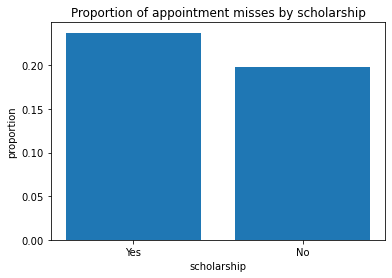

In [26]:
plt.bar(yes_no, sch_prop);
bar_title('scholarship');

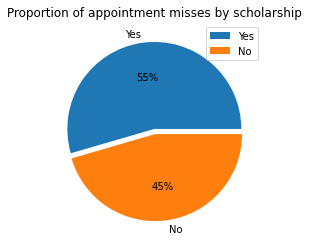

In [27]:
sch_no_show = pd.DataFrame({'value': sch_prop}, index=yes_no)

sch_no_show.plot.pie(subplots=True, autopct='%1.0f%%', explode=(0.025, 0.035));

pie_title('scholarship')

> **Report**: The analysis shows that a higher proportion of people who missed their appointments had scholarships.

### Question 2: How does receiving sms influence missing appointment?

In [28]:
df_v3.SMS_received.value_counts()

0    75044
1    35482
Name: SMS_received, dtype: int64

In [29]:
p2 = df_v3.groupby(["missed_appointment", "SMS_received"]).size()
p2.unstack()

SMS_received,0,1
missed_appointment,,
No,62509,25698
Yes,12535,9784


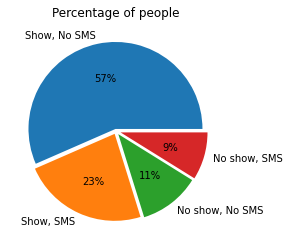

In [30]:
my_p2_labels = ['Show, No SMS','Show, SMS','No show, No SMS','No show, SMS']

p2.plot.pie(subplots=True, autopct='%1.0f%%', labels=my_p2_labels, explode=(0.025, 0.035, 0.045, 0.055));

pie_percentage()

In [31]:
prop_sms_no_show = 9784/(9784+25698)
prop_no_sms_no_show = 12535/(12535+62509)

sms_prop = prop_sms_no_show, prop_no_sms_no_show
sms_prop

(0.27574544839637, 0.16703533926762965)

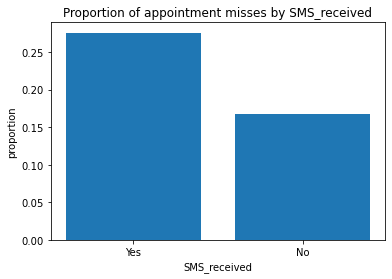

In [32]:
plt.bar(yes_no, sms_prop)
bar_title('SMS_received')

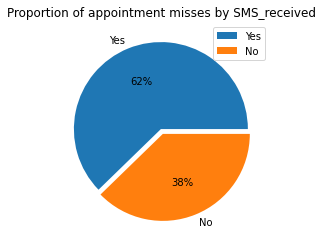

In [33]:
sms_no_show = pd.DataFrame({'value': sms_prop}, index=yes_no)

sms_no_show.plot.pie(subplots=True, autopct='%1.0f%%', explode=(0.025, 0.035));

pie_title('SMS_received')

> **Report**: This analysis shows that approximately **62%** of people who received sms still missed their appointments.

### Question 3: How does alcohol influence whether a person misses their appointment?

In [34]:
df_v3.alcoholism.value_counts()

0    107166
1      3360
Name: alcoholism, dtype: int64

In [35]:
p3 = df_v3.groupby(["missed_appointment", "alcoholism"]).size()
p3.unstack()

alcoholism,0,1
missed_appointment,,
No,85524,2683
Yes,21642,677


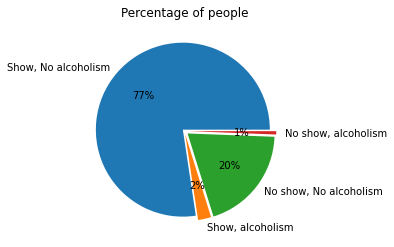

In [36]:
my_p3_labels = ['Show, No alcoholism','Show, alcoholism','No show, No alcoholism','No show, alcoholism'];

p3.plot.pie(subplots=True, autopct='%1.0f%%', labels=my_p3_labels, explode=(0.025, 0.035, 0.045, 0.055));

pie_percentage()

In [37]:
prop_alcoholism_no_show = 677/(677+2683)
prop_no_alcoholism_no_show = 21642/(21642+85524)

alcoholism_prop = prop_alcoholism_no_show, prop_no_alcoholism_no_show
alcoholism_prop

(0.20148809523809524, 0.20194837915010358)

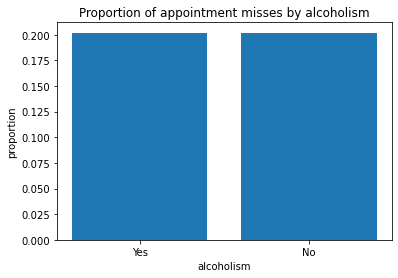

In [38]:
plt.bar(yes_no, alcoholism_prop);
bar_title('alcoholism')

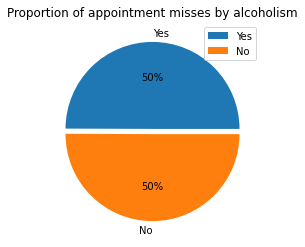

In [39]:
alcoholism_no_show = pd.DataFrame({'value': alcoholism_prop}, index=yes_no)

alcoholism_no_show.plot.pie(subplots=True, autopct='%1.0f%%', explode=(0.025, 0.035));

pie_title('alcoholism')

> **Report**: The proportion of alcoholics that missed their appointment is approximately **0.04%** lower than that of none alcoholics.

### Question 4: How does gender influence whether a person misses their appointment?

In [40]:
df_v3.gender.value_counts()

F    71839
M    38687
Name: gender, dtype: int64

In [41]:
p4 = df_v3.groupby(["missed_appointment", "gender"]).size()
p4.unstack()

gender,F,M
missed_appointment,,
No,57245,30962
Yes,14594,7725


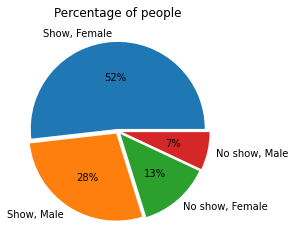

In [42]:
my_p4_labels = ['Show, Female','Show, Male','No show, Female','No show, Male'];

p4.plot.pie(subplots=True, autopct='%1.0f%%', labels=my_p4_labels, explode=(0.025, 0.035, 0.045, 0.055));

pie_percentage()

In [43]:
prop_female_no_show = 14594/(14594+57245)
prop_male_no_show = 7725/(7725+30962)

gender_prop = prop_female_no_show, prop_male_no_show
gender_prop

(0.20314870752655242, 0.19967947889471915)

In [44]:
gender = ['Female', 'Male']

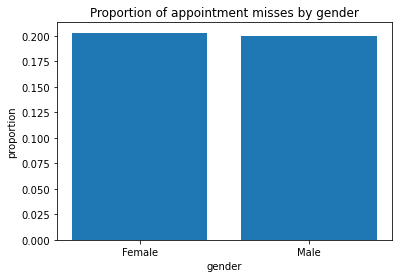

In [45]:
plt.bar(gender, gender_prop);
bar_title('gender')

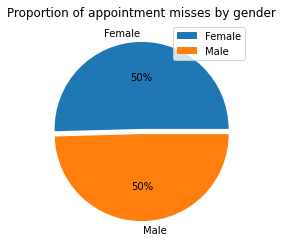

In [46]:
gender_no_show = pd.DataFrame({'value': gender_prop}, index=gender)

gender_no_show.plot.pie(subplots=True, autopct='%1.0f%%', explode=(0.025, 0.035));

pie_title('gender')

> **Report**: The proportion of women who missed their appointments is just **0.34%** higher than that of men.

<a id='limitations'></a>
## Limitations
> **-** No information as to how the data was collected and colated, as such the data and its analysis cannot be considered to be fully reliable.                                          
> **-** Adequate information on columns which may have shown or indicated casuation were not provided.

<a id='conclusions'></a>
## Conclusion
> From the analysis of the different variables that were analyzed, it can be seen that of the people who missed their appointments approximately 10% more had scholarships, 24% more received SMS, surprisingly 0.04% less had alcoholism and 0.034% more were women.

> **Note:**
>It should be noted that this does not imply casuation. Also the data may not be sufficient for a general prediction for a random individual based on this studies. Further analysis is required.
